In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("/content/loan_approval_dataset.csv")


In [24]:
print(df.shape)
print(df.columns)


(4269, 13)
Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [25]:

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [26]:
#Handle Missing Data
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt



In [28]:
#Remove space from column name
df.columns=df.columns.str.strip()

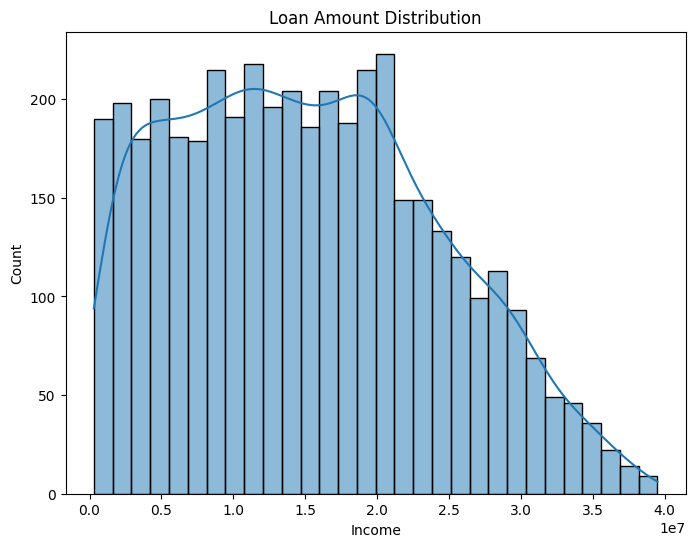

In [29]:
#Loan Amount Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['loan_amount'],bins=30,kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Income")
plt.show()

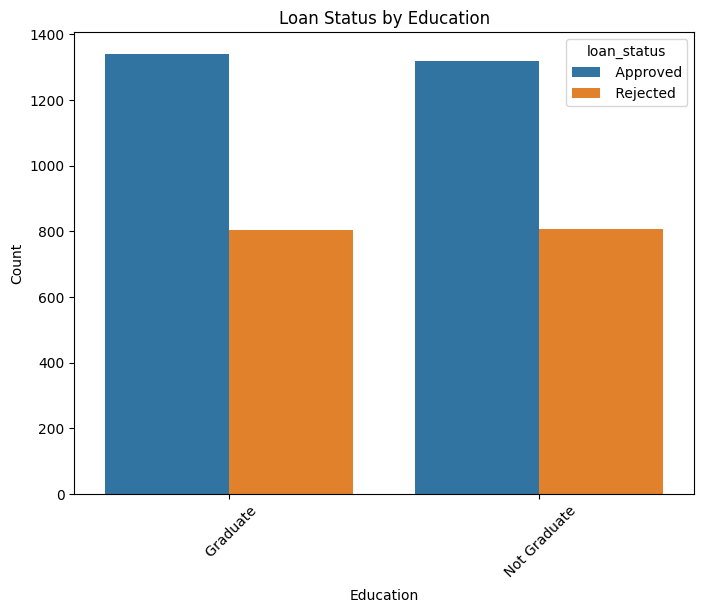

In [30]:
#Education vs Loan Status
plt.figure(figsize=(8,6))
sns.countplot(x='education',hue='loan_status',data=df)
plt.title("Loan Status by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

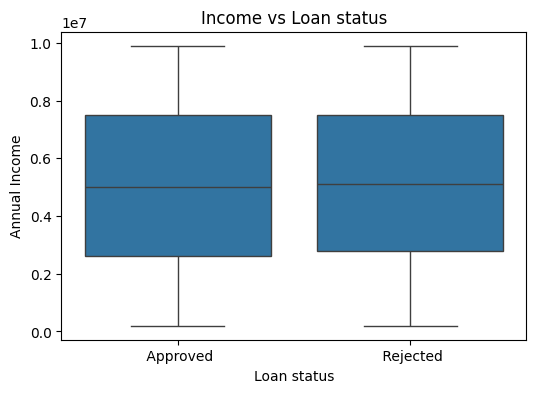

In [31]:
# Annual Income Distribution by Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status',y='income_annum',data=df)
plt.title("Income vs Loan status")
plt.xlabel("Loan status")
plt.ylabel("Annual Income")
plt.show()


In [32]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
#clean column names
df.columns=df.columns.str.strip()
#Encode categorical columns
categorical_cols=['education','self_employed','loan_status']
le=LabelEncoder()
for col in categorical_cols:
  df[col]=le.fit_transform(df[col])




In [33]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [34]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X=df.drop(['loan_status','loan_id'],axis=1)
Y=df['loan_status']
#Split the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Y_pred=model.predict(X_test)
print("\nAccuracy: ",accuracy_score(Y_test,Y_pred))
print("\nClassification_Report: ",classification_report(Y_test,Y_pred))
print("\nConfusion_matrix: ",confusion_matrix(Y_test,Y_pred))


Accuracy:  0.7985948477751756

Classification_Report:                precision    recall  f1-score   support

           0       0.80      0.91      0.85       536
           1       0.80      0.61      0.69       318

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854


Confusion_matrix:  [[488  48]
 [124 194]]
